In [16]:
#import statements
from pyspark.sql import SparkSession

In [17]:
spark = SparkSession.builder.enableHiveSupport().appName('ReadWriteData').getOrCreate()
sc = spark.sparkContext

In [18]:
#check to see if thata is available in HDFS
!hdfs dfs -ls /user/zxie8/big_data/

Java HotSpot(TM) 64-Bit Server VM warning: ignoring option MaxPermSize=512M; support was removed in 8.0
Found 13 items
drwxr-xr-x   - zxie8 zxie8          0 2020-08-20 16:02 /user/zxie8/big_data/CF_Model_1
drwxr-xr-x   - zxie8 zxie8          0 2020-08-25 02:06 /user/zxie8/big_data/CF_Model_VG_1
-rw-r--r--   3 zxie8 zxie8       4215 2020-08-19 18:49 /user/zxie8/big_data/Movie_Collect.csv
drwxr-xr-x   - zxie8 zxie8          0 2020-08-15 03:05 /user/zxie8/big_data/airports
drwxr-xr-x   - zxie8 zxie8          0 2020-08-20 16:03 /user/zxie8/big_data/als
drwxr-xr-x   - zxie8 zxie8          0 2020-08-20 18:10 /user/zxie8/big_data/als_1
drwxr-xr-x   - zxie8 zxie8          0 2020-08-25 02:10 /user/zxie8/big_data/als_VG_1
drwxr-xr-x   - zxie8 zxie8          0 2020-08-08 05:32 /user/zxie8/big_data/instacart
drwxr-xr-x   - zxie8 zxie8          0 2020-08-08 06:55 /user/zxie8/big_data/movies
-rw-r--r--   3 zxie8 zxie8   77447891 2020-08-18 22:30 /user/zxie8/big_data/mpst_full_data.csv
-rw-r--r--   3

In [19]:
%time data = sc.textFile("/user/zxie8/big_data/review.json")
#%time data = sc.textFile("T:/data/chicago-food-inspections/food-inspections.csv")

CPU times: user 2.31 ms, sys: 615 µs, total: 2.93 ms
Wall time: 124 ms


In [20]:
#Total Record Count
%time data.count()

CPU times: user 15.8 ms, sys: 8.9 ms, total: 24.7 ms
Wall time: 18.2 s


8021122

### Reading Data

In [21]:
path = "/user/zxie8/big_data/review.json"
df = spark.read.json(path)

In [22]:
# df=spark.read.json("/user/zxie8/big_data/review.json", multiLine=True)

In [23]:
df.count()

8021122

In [24]:
df.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



In [25]:
df.createOrReplaceTempView("review")

In [26]:
# val df1 = spark.sql("SELECT * FROM  review limit 10")
# df1.show()

In [27]:
df.show(3)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|-MhfebM0QIsKt87iD...|   0|2015-04-15 05:21:16|    0|xQY8N_XvtGbearJ5X...|  2.0|As someone who ha...|     5|OwjRMXRC0KyPrIlcj...|
|lbrU8StCq3yDfr-QM...|   0|2013-12-07 03:16:52|    1|UmFMZ8PyXZTY2Qcwz...|  1.0|I am actually hor...|     1|nIJD_7ZXHq-FX8byP...|
|HQl28KMwrEKHqhFrr...|   0|2015-12-05 03:18:11|    0|LG2ZaYiOgpr2DK_90...|  5.0|I love Deagan's. ...|     1|V34qejxNsCbcgD8C0...|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
only showing top 3 rows



In [28]:
from pyspark.sql import HiveContext
hive_context = HiveContext(sc)

In [29]:
df1 = hive_context.table("big_data_group_2.review")
df1.show(5)

+--------------------+--------------------+--------------------+-----+-------------------+--------------------+------+-----+----+
|           review_id|             user_id|         business_id|stars|               date|                text|useful|funny|cool|
+--------------------+--------------------+--------------------+-----+-------------------+--------------------+------+-----+----+
|xQY8N_XvtGbearJ5X...|OwjRMXRC0KyPrIlcj...|-MhfebM0QIsKt87iD...|  2.0|2015-04-15 05:21:16|As someone who ha...|     5|    0|   0|
|UmFMZ8PyXZTY2Qcwz...|nIJD_7ZXHq-FX8byP...|lbrU8StCq3yDfr-QM...|  1.0|2013-12-07 03:16:52|I am actually hor...|     1|    1|   0|
|LG2ZaYiOgpr2DK_90...|V34qejxNsCbcgD8C0...|HQl28KMwrEKHqhFrr...|  5.0|2015-12-05 03:18:11|I love Deagan's. ...|     1|    0|   0|
|i6g_oA9Yf9Y31qt0w...|ofKDkJKXSKZXu5xJN...|5JxlZaqCnk1MnbgRi...|  1.0|2011-05-27 05:30:52|Dismal, lukewarm,...|     0|    0|   0|
|6TdNDKywdbjoTkize...|UgMW8bLE0QMJDCkQ1...|IS4cv902ykd8wj1TR...|  4.0|2017-01-14 21:56:57|

In [30]:
#display data in a table
spark.sql('select * from big_data_group_2.review').show(5)

+--------------------+--------------------+--------------------+-----+-------------------+--------------------+------+-----+----+
|           review_id|             user_id|         business_id|stars|               date|                text|useful|funny|cool|
+--------------------+--------------------+--------------------+-----+-------------------+--------------------+------+-----+----+
|xQY8N_XvtGbearJ5X...|OwjRMXRC0KyPrIlcj...|-MhfebM0QIsKt87iD...|  2.0|2015-04-15 05:21:16|As someone who ha...|     5|    0|   0|
|UmFMZ8PyXZTY2Qcwz...|nIJD_7ZXHq-FX8byP...|lbrU8StCq3yDfr-QM...|  1.0|2013-12-07 03:16:52|I am actually hor...|     1|    1|   0|
|LG2ZaYiOgpr2DK_90...|V34qejxNsCbcgD8C0...|HQl28KMwrEKHqhFrr...|  5.0|2015-12-05 03:18:11|I love Deagan's. ...|     1|    0|   0|
|i6g_oA9Yf9Y31qt0w...|ofKDkJKXSKZXu5xJN...|5JxlZaqCnk1MnbgRi...|  1.0|2011-05-27 05:30:52|Dismal, lukewarm,...|     0|    0|   0|
|6TdNDKywdbjoTkize...|UgMW8bLE0QMJDCkQ1...|IS4cv902ykd8wj1TR...|  4.0|2017-01-14 21:56:57|

In [31]:
from pyspark.sql import functions as F

import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df.rdd.getNumPartitions()

48

In [33]:
df.dtypes

[('business_id', 'string'),
 ('cool', 'bigint'),
 ('date', 'string'),
 ('funny', 'bigint'),
 ('review_id', 'string'),
 ('stars', 'double'),
 ('text', 'string'),
 ('useful', 'bigint'),
 ('user_id', 'string')]

In [34]:
df.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



In [35]:
df.show(3)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|-MhfebM0QIsKt87iD...|   0|2015-04-15 05:21:16|    0|xQY8N_XvtGbearJ5X...|  2.0|As someone who ha...|     5|OwjRMXRC0KyPrIlcj...|
|lbrU8StCq3yDfr-QM...|   0|2013-12-07 03:16:52|    1|UmFMZ8PyXZTY2Qcwz...|  1.0|I am actually hor...|     1|nIJD_7ZXHq-FX8byP...|
|HQl28KMwrEKHqhFrr...|   0|2015-12-05 03:18:11|    0|LG2ZaYiOgpr2DK_90...|  5.0|I love Deagan's. ...|     1|V34qejxNsCbcgD8C0...|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
only showing top 3 rows



In [36]:
df1.show(3)

+--------------------+--------------------+--------------------+-----+-------------------+--------------------+------+-----+----+
|           review_id|             user_id|         business_id|stars|               date|                text|useful|funny|cool|
+--------------------+--------------------+--------------------+-----+-------------------+--------------------+------+-----+----+
|xQY8N_XvtGbearJ5X...|OwjRMXRC0KyPrIlcj...|-MhfebM0QIsKt87iD...|  2.0|2015-04-15 05:21:16|As someone who ha...|     5|    0|   0|
|UmFMZ8PyXZTY2Qcwz...|nIJD_7ZXHq-FX8byP...|lbrU8StCq3yDfr-QM...|  1.0|2013-12-07 03:16:52|I am actually hor...|     1|    1|   0|
|LG2ZaYiOgpr2DK_90...|V34qejxNsCbcgD8C0...|HQl28KMwrEKHqhFrr...|  5.0|2015-12-05 03:18:11|I love Deagan's. ...|     1|    0|   0|
+--------------------+--------------------+--------------------+-----+-------------------+--------------------+------+-----+----+
only showing top 3 rows



In [37]:
dat1=df.groupby("stars").count().sort("stars")
dat1.show()

+-----+-------+
|stars|  count|
+-----+-------+
|  1.0|1283897|
|  2.0| 635072|
|  3.0| 842289|
|  4.0|1673404|
|  5.0|3586460|
+-----+-------+



### Making Plots

In [38]:
# Error!!!
# pdf = df.toPandas()
# pdf.plot(kind= 'bar', x='stars')

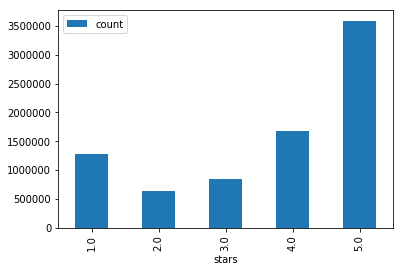

In [39]:
pdf_dat1=dat1.toPandas()
pdf_dat1.plot(kind= 'bar', x='stars')

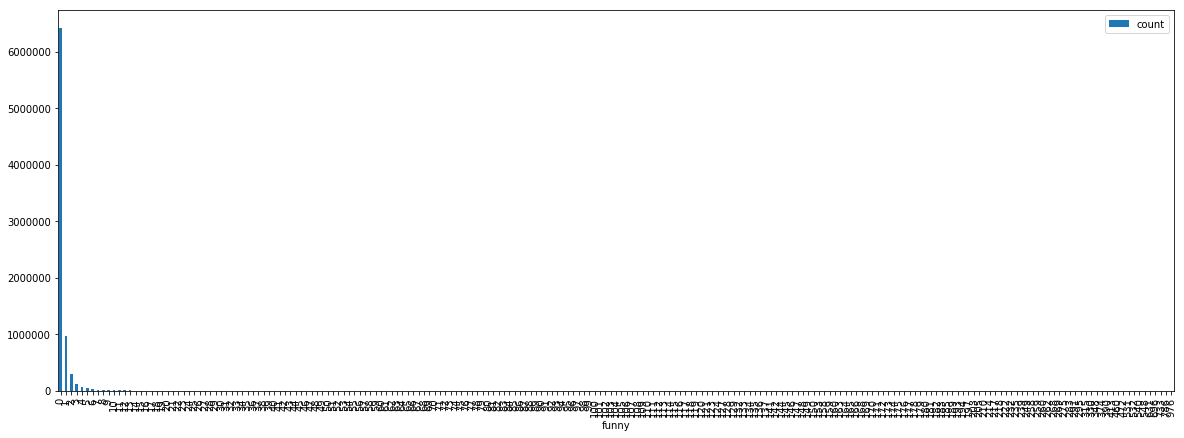

In [78]:
dat1=df.groupby("funny").count().sort("funny").orderBy(["funny"], descending=[0])
pdf_dat1=dat1.toPandas()
pdf_dat1.plot(figsize=(20,7),kind= 'bar', x='funny')

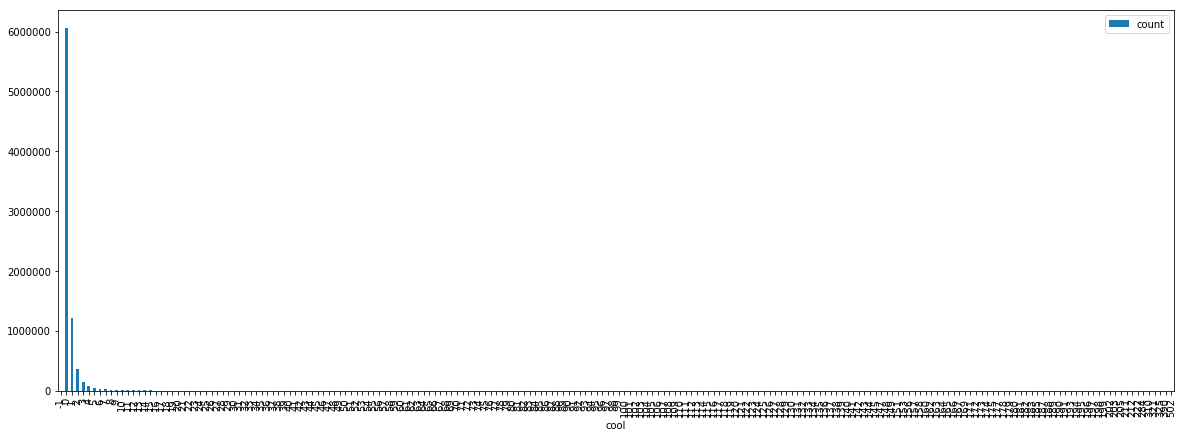

In [80]:
dat2=df.groupby("cool").count().sort("cool").orderBy(["cool"], descending=[0])
pdf_dat2=dat2.toPandas()
pdf_dat2.plot(figsize=(20,7),kind= 'bar', x='cool')

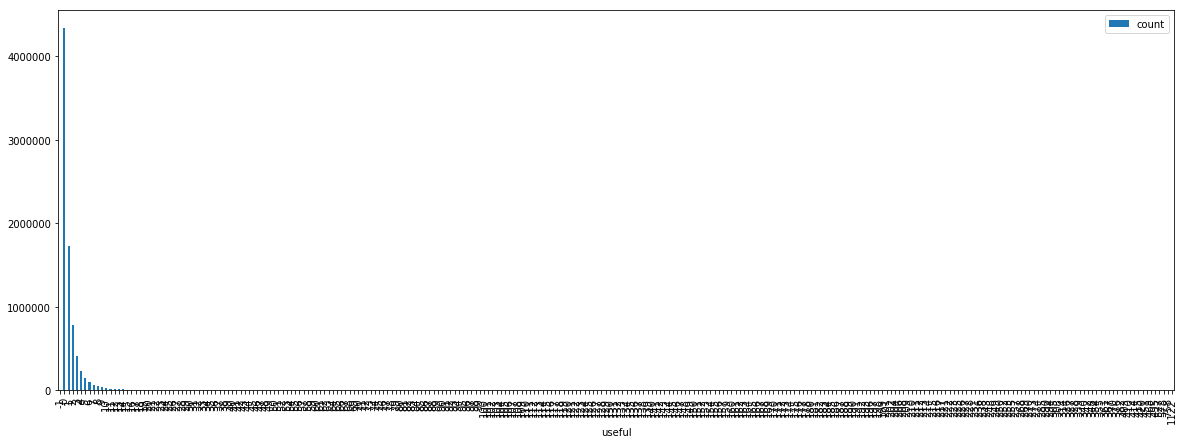

In [81]:
dat3=df.groupby("useful").count().sort("useful").orderBy(["useful"], descending=[0])
pdf_dat3=dat3.toPandas()
pdf_dat3.plot(figsize=(20,7),kind= 'bar', x='useful')

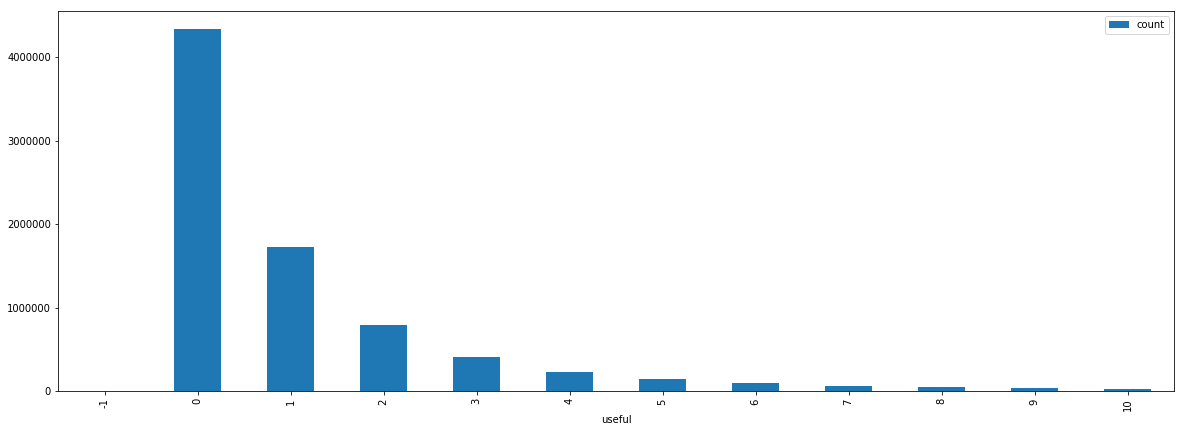

In [83]:
dat3=df.filter(df.useful <= 10).groupby("useful").count().sort("useful").orderBy(["useful"], descending=[0])
pdf_dat3=dat3.toPandas()
pdf_dat3.plot(figsize=(20,7),kind= 'bar', x='useful')

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql import HiveContext
hive_context = HiveContext(sc)

In [3]:
bus_by_ratings = hive_context.sql('select * from big_data_group_2.business_julian')

In [9]:
# import seaborn as sns
# # plt.figure(figsize = (10,10))

# ax = sns.barplot(bus_by_ratings.business_id, bus_by_ratings.stars, alpha = 0.5, palette = 'rainbow_r')
# plt.title("Distribution of Ratings")
# plt.ylabel('Count', fontsize = 12)
# plt.xlabel('Rating (out of 5 stars) ', fontsize = 12)

# plt.show()

In [14]:
bus_by_ratings1=bus_by_ratings.groupby("stars").count().sort("stars")
bus_by_ratings1.show()

+-----+-----+
|stars|count|
+-----+-----+
|  1.0| 5898|
|  1.5| 6004|
|  2.0|13124|
|  2.5|21435|
|  3.0|28634|
|  3.5|38079|
|  4.0|39199|
|  4.5|29940|
|  5.0|27080|
+-----+-----+



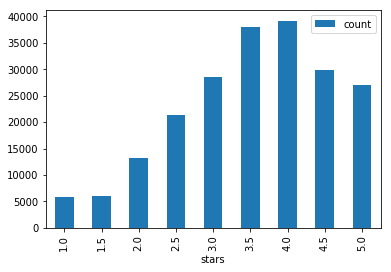

In [15]:
pdf_bus_by_ratings1=bus_by_ratings1.toPandas()
pdf_bus_by_ratings1.plot(kind= 'bar', x='stars')